# Enquête Digit_hum

 Sondage : Manipuler des données en Sciences Humaines et Sociales (SHS) : R, Python, ou autre ?
 
- Diffusion 27 mars 2023
- Premier traitement : courant mai
- Reprise : courant août

### Points à discuter

- comment prendre en compte les disciplines

## Chargement des bibliothèques & données

Bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyshs
import json
import warnings
warnings.simplefilter('ignore')

Données (extraites de Limesurvey)

In [2]:
data = pd.read_csv("./manipuler_des_donnees_en_sciences_humaines_et_sociales_shs___r_python_ou_autre_2023_05_03.csv",sep=";",
                   skiprows=[0,1])

Recodage du nom des variables à partir d'une sortie extérieure

In [3]:
#json.dump(reco,open("./reco_columns.json","w"))
reco = json.load(open("./reco_columns.json","r"))
data = data.rename(columns= reco)
data = data.drop(columns="drop")
print(data.shape)
data.columns

(216, 80)


Index(['heure', 'genre', 'statut', 'autre', 'contrat', 'age',
       'disc_Anthropologie', 'disc_Archéologie', 'disc_Economie',
       'disc_Géographie', 'disc_Histoire', 'disc_Linguistique',
       'disc_Littérature', 'disc_Philosophie', 'disc_Psychologie',
       'disc_Sociologie', 'disc_Autre', 'prog_A+', 'prog_Bash', 'prog_C',
       'prog_Java', 'prog_JavaScript', 'prog_Julia', 'prog_Pascal',
       'prog_Perl', 'prog_PHP', 'prog_Python', 'prog_R', 'prog_Rust',
       'prog_Swift', 'prog_SQL', 'prog_Autre', 'prog_Autre_lang',
       'donnees_Image', 'donnees_Son', 'donnees_Vidéo', 'donnees_Texte',
       'donnees_Géographique', 'donnees_Numérique', 'donnees_autres',
       'entendu_python', 'familiarite_python', 'experience_python',
       'activite_python', 'niveau_python', 'pratique_python',
       'exemples_python', 'temps_python', 'collegues_python',
       'traitements_python', 'ressources_python', 'entendu_r', 'familiarite_r',
       'experience_r', 'activite_r', 'niveau_r',

Nettoyage des données et recodage des variables

In [4]:
#enlever si l'âge n'est pas mentionné
f_missing = data["age"].notna()
data = data[f_missing]

# recodage des discisciplines : sortie des disciplines autres > recodage manuel
# data[["disc_Autre"]].dropna().to_excel("reco_disciplines.xlsx")
reco_disc = pd.read_excel("reco_disciplines.xlsx")
data["disc_Autre_reco"] = reco_disc.set_index("Unnamed: 0")["Recodage"]
disc = ['disc_Anthropologie',
 'disc_Archéologie',
 'disc_Economie',
 'disc_Géographie',
 'disc_Histoire',
 'disc_Linguistique',
 'disc_Littérature',
 'disc_Philosophie',
 'disc_Psychologie',
 'disc_Sociologie',
 'disc_Autre_reco']
for i in disc[:-1]:
    data[i+"_reco"] = data[i].apply(lambda x : i.replace("disc_","") if pd.notnull(x) else x)
def vers_liste(x):
    return list(set([i for i in list(x) if type(i)==str]))
data["disciplines"] = data[[i for i in data.columns if "disc" in i and "reco" in i]].apply(vers_liste,axis=1)

reco = {"Je l'utilise, à un niveau débutant":"2-usage débutant",
       "Je l'utilise, à un niveau intermédiaire":"3-usage intermédiaire",
       "J'en ai juste entendu parlé":"1-entendu parlé", "Je l'utilise, à un niveau avancé":"4-usage avancé",
       "J'en ai juste entendu parler":"1-entendu parlé","Je ne connais pas":"NA"}
reco = {"Je l'utilise, à un niveau débutant":"2. Use it (beginner)",
       "Je l'utilise, à un niveau intermédiaire":"3. Use it (intermediary)",
       "J'en ai juste entendu parlé":"1. Heard about it", "Je l'utilise, à un niveau avancé":"4. Use it (advanced)",
       "J'en ai juste entendu parler":"1. Heard about it","Je ne connais pas":"0. Don't know"}
data["familiarite_python"] = data["familiarite_python"].replace(reco).fillna("NA")
data["familiarite_notebook"] = data["familiarite_notebook"].replace(reco)#.fillna("0. Don't know")
data["familiarite_r"] = data["familiarite_r"].replace(reco).fillna("NA")
reco = {'46 - 55 ans': '5. 46 - 55',
 '26 - 35 ans': '2. 26 - 35',
 'Moins de 25 ans': '1. <25',
 '36 - 45 ans': '3. 36 - 45',
 'Plus de 56 ans': '5. >56'}
data["age"] = data["age"].replace(reco)

reco = {"Oui, à la fois pour la recherche et pour l'enseignement":"4. Teaching and research",
       'Oui, pour la recherche':"2. Only research", 'Non':"1. No", "Oui, pour l'enseignement":"3. Only teaching"}
data["experience_notebook"] = data["experience_notebook"].replace(reco)

reco = {'0 à 3 ans':"0-3",  '3 à 5 ans':"3-5", '5 à 10 ans':"5-10"}
data["temps_notebook"] = data["temps_notebook"].replace(reco)

reco = {'Oui, un peu':"2. Yes, a few", 'Oui, beaucoup':"3. Yes, a lot", 'Non':"1. No"}
data["collegue_notebook"] = data["collegue_notebook"].replace(reco)

reco = {'Oui, plutôt':"2-Oui, plutôt", 'Oui, beaucoup':"3-Oui, beaucoup", 'Je ne sais pas':"4-NSP",
       'Non, pas du tout':"1-Non, pas du tout"}
data["progsci_shs"] = data["progsci_shs"].replace(reco)

## Description échantillon

In [23]:
pd.concat({"Age":pyshs.tri_a_plat(data,"age"),
 "Genre":pyshs.tri_a_plat(data,"genre"),
 "Statut":pyshs.tri_a_plat(data,"statut"),
 "Type de contrat":pyshs.tri_a_plat(data,"contrat"),
          })

Effectif  Pourcentage (%)
Age             1. <25                                 19.0              9.2
                2. 26 - 35                             80.0             38.8
                3. 36 - 45                             51.0             24.8
                5. 46 - 55                             39.0             18.9
                5. >56                                 17.0              8.3
                Total                                 206.0            100.0
Genre           Autre                                   6.0              2.9
                F                                     102.0             50.0
                H                                      96.0             47.1
                Total                                 204.0            100.0
Statut          Chercheur                              23.0             11.2
                Doctorant                              45.0             21.8
                Enseignant-chercheur                   39.0             18.9
                Etudiant (jusqu'au master 2)           19.0              9.2
                Ingénieur d'études                     45.0             21.8
                Ingénieur de recherche                 18.0              8.7
                Post-doctorant                         17.0              8.3
                Total                                 206.0             99.9
Type de contrat CDI de droit privé                     16.0              8.2
                Non titulaire (CDD)                    84.0             42.9
                Titulaire de la fonction publique      96.0             49.0
                Total                                 196.0            100.1

Tableau des disciplines

In [38]:
disciplines = set([j for i in list(data["disciplines"]) for j in i])
pd.Series(
    {d:round(100*data["disciplines"].apply(lambda x : True if d in x else False).sum()/len(data),1) for d in disciplines}
 ).sort_values(ascending=False)

Histoire                  34.0
Sociologie                27.2
Linguistique              25.2
Littérature               22.8
Archéologie               15.5
Anthropologie             10.2
Géographie                 9.2
Philosophie                9.2
SIC                        7.8
Psychologie                3.9
Economie                   2.9
Science politique          2.4
Autre                      2.4
Humanités numériques       1.9
Droit                      0.5
Démographie                0.5
Informatique               0.5
Urbanisme                  0.5
Religion                   0.5
Arts                       0.5
Science de l’éducation     0.5
dtype: float64

Langages de programmation utilisés

In [35]:
pd.Series(
    {i:round(100*len(data[i].dropna())/len(data),1) for i in data.columns if "prog_" in i}
).sort_values(ascending=False)

prog_Python        63.6
prog_R             55.3
prog_SQL           45.1
prog_JavaScript    27.2
prog_PHP           24.8
prog_Autre_lang    24.8
prog_Bash          24.3
prog_Autre         15.5
prog_C             14.6
prog_Java          13.6
prog_Perl          11.2
prog_Pascal         4.4
prog_Rust           1.9
prog_Julia          1.0
prog_A+             0.0
prog_Swift          0.0
dtype: float64

Type de données utilisées (%)

In [39]:
pd.Series(
    {i:round(100*len(data[i].dropna())/len(data),1) for i in data.columns if "donnees_" in i}
         ).sort_values(ascending=False)

donnees_Texte           92.2
donnees_Numérique       47.6
donnees_Image           38.3
donnees_Géographique    22.8
donnees_Son              9.7
donnees_Vidéo            7.8
donnees_autres           6.8
dtype: float64

## Programmation scientifique

Est-ce qu'il faut développer en général la programmation scientifique en SHS ?

In [40]:
pyshs.tri_a_plat(data,"progsci_shs")

,Effectif,Pourcentage (%)
"1-Non, pas du tout",4.0,2.1
"2-Oui, plutôt",79.0,41.8
"3-Oui, beaucoup",88.0,46.6
4-NSP,18.0,9.5
Total,189.0,100.0


## Usages de Python & R

In [41]:
pd.concat({"Entendu parler de Python":pyshs.tri_a_plat(data,"entendu_python"),
"Entendu parler de R":pyshs.tri_a_plat(data,"entendu_r")},axis=1)

Entendu parler de Python                 Entendu parler de R  \
                      Effectif Pourcentage (%)            Effectif   
Non                        7.0             3.4                15.0   
Oui                      199.0            96.6               191.0   
Total                    206.0           100.0               206.0   

                       
      Pourcentage (%)  
Non               7.3  
Oui              92.7  
Total           100.0

In [42]:
pd.concat({"Familiarité Python":pyshs.tri_a_plat(data,"familiarite_python"),
"Familiarité R":pyshs.tri_a_plat(data,"familiarite_r")},axis=1)

Familiarité Python                 Familiarité R  \
                                   Effectif Pourcentage (%)      Effectif   
1. Heard about it                      62.0            30.1          62.0   
2. Use it (beginner)                   62.0            30.1          69.0   
3. Use it (intermediary)               47.0            22.8          42.0   
4. Use it (advanced)                   28.0            13.6          17.0   
NA                                      7.0             3.4          15.0   
Total                                 206.0           100.0         206.0   
0. Don't know                           NaN             NaN           1.0   

                                          
                         Pourcentage (%)  
1. Heard about it                   30.1  
2. Use it (beginner)                33.5  
3. Use it (intermediary)            20.4  
4. Use it (advanced)                 8.3  
NA                                   7.3  
Total                              100.1  
0. Don't know                        0.5

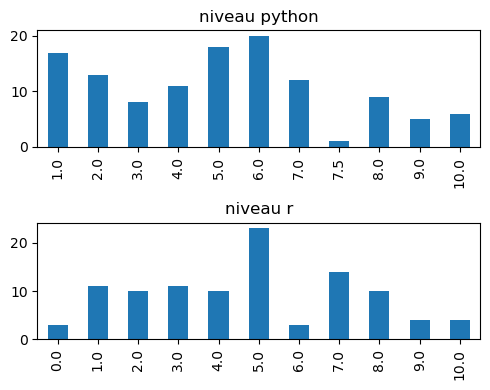

In [47]:
fig,ax = plt.subplots(2,1,figsize=(5,4))
data["niveau_python"].value_counts().sort_index().plot(kind='bar',title="niveau python",ax=ax[0])
data["niveau_r"].value_counts().sort_index().plot(kind='bar',title="niveau r",ax=ax[1])
plt.tight_layout()

## Les usages de Jupyter

Exploration plus avancées dans le cadre de Jupytercon

Toutes les questions 

- "Connaissez-vous les Carnets interactifs (notebook) : par exemple Jupyter, Rmarkdown, Google Colab ? ": "entendu_jupyter"
- "Avez-vous déjà utilisé des Carnets interactifs (Jupyter ou Google Colab) ? ": "usage_jupyter"
- "Jupyter": "notebook_Jupyter", "Google Colab": "notebook_Google Colab", "Autre.1": "notebook_Autre.1"
- "Quelle est votre familiarité avec les Carnets interactifs ?": "familiarite_notebook"
- "Avez-vous déjà eu au moins une expérience de travail qui utilisait des Carnets interactifs ? ": "experience_notebook"
- "Comment situez-vous votre pratique  sur une échelle de 1 à 10: "niveau_notebook"
- "Pourriez-vous décrire votre expérience ? ": "pratique_notebook", 
- "Nous sommes à la recherche d'exemples pour faciliter le partage de ces pratiques, donc si possible, indiquez le nom du / des projets ? .2": "exemple_notebook"
- "Depuis combien de temps utilisez-vous des Carnets interactifs dans le cadre de vos travaux ?": "temps_notebook"
- "Connaissez-vous ou collaborez-vous avec des collègues utilisant des Carnets interactifs dans le cadre de leurs recherches ?   ": "collegue_notebook"
- " Quels sont les principaux traitements que vous réalisez à l'aide des des Carnets interactifs dans le cadre de vos recherches ? : "traitement_notebook"
- "Quel(s) type(s) de solution(s) des Carnets interactifs vous utilisez (Google Colab, installation locale ou autre) ?   ": "type_notebook"
- "Quelles sont les ressources (formation en-ligne, cours en présentiel, manuels, tutoriels) que vous trouvez les plus utiles pour l'utilisation des Carnets interactifs pour conseiller à un collègue qui voudrait débuter ?": "ressources_notebook"

In [7]:
pd.concat({"Entendu parler de Jupyter":pyshs.tri_a_plat(data,"entendu_jupyter"),
 "Usage":pyshs.tri_a_plat(data,"usage_jupyter"),
 "Usage depuis":pyshs.tri_a_plat(data,"temps_notebook"),

 "Familiarité":pyshs.tri_a_plat(data,"familiarite_notebook"),
 "Des collègues utilisent":pyshs.tri_a_plat(data,"collegue_notebook"),
           
           
           
          })

Effectif  Pourcentage (%)
Entendu parler de Jupyter Non, je ne connais pas        56.0             27.2
                          Oui, je connais              150.0             72.8
                          Total                        206.0            100.0
Usage                     Non                           37.0             25.3
                          Oui                          109.0             74.7
                          Total                        146.0            100.0
Usage depuis              0-3                           96.0             72.7
                          3-5                           23.0             17.4
                          5-10                          13.0              9.8
                          Total                        132.0             99.9
Familiarité               0. Don't know                  1.0              0.7
                          1. Heard about it             30.0             20.4
                          2. Use it (beginner)          52.0             35.4
                          3. Use it (intermediary)      41.0             27.9
                          4. Use it (advanced)          23.0             15.6
                          Total                        147.0            100.0
Des collègues utilisent   1. No                         35.0             25.4
                          2. Yes, a few                 76.0             55.1
                          3. Yes, a lot                 27.0             19.6
                          Total                        138.0            100.1

In [92]:
t = pyshs.tableau_croise(data.fillna("0. Don't know"),"familiarite_notebook","collegue_notebook")
t.index.name = "Personnal use of Jupyter"
t.columns.name = "Colleagues using Jupyter"
t

Colleagues using Jupyter,0. Don't know,1. No,"2. Yes, a few","3. Yes, a lot",Total
Personnal use of Jupyter,,,,,
0. Don't know,58.0 (96.7%),0.0 (0.0%),2.0 (3.3%),0.0 (0.0%),60 (100%)
1. Heard about it,7.0 (23.3%),13.0 (43.3%),10.0 (33.3%),0.0 (0.0%),30 (100%)
2. Use it (beginner),2.0 (3.8%),14.0 (26.9%),32.0 (61.5%),4.0 (7.7%),52 (100%)
3. Use it (intermediary),1.0 (2.4%),5.0 (12.2%),22.0 (53.7%),13.0 (31.7%),41 (100%)
4. Use it (advanced),0.0 (0.0%),3.0 (13.0%),10.0 (43.5%),10.0 (43.5%),23 (100%)
Total,68.0 (33.0%),35.0 (17.0%),76.0 (36.9%),27.0 (13.1%),206 (100%)


In [49]:
pd.concat({"Jupyter":pyshs.tri_a_plat(data.fillna("NA"),"notebook_Jupyter"),
"Colab":pyshs.tri_a_plat(data.fillna("NA"),"notebook_Google Colab"),
"Autre":pyshs.tri_a_plat(data.fillna("NA"), "notebook_Autre.1")},axis=1)

Jupyter                    Colab                    Autre  \
      Effectif Pourcentage (%) Effectif Pourcentage (%) Effectif   
NA       103.0            50.0    156.0            75.7    177.0   
X        103.0            50.0     50.0            24.3     29.0   
Total    206.0           100.0    206.0           100.0    206.0   

                       
      Pourcentage (%)  
NA               85.9  
X                14.1  
Total           100.0

Relation âge/familiarité

In [35]:
t,p = pyshs.tableau_croise(data,"age","familiarite_notebook",p=True)
print(p)
t

0.008943704965512169


,0. Don't know,1. Heard about it,2. Use it (beginner),3. Use it (intermediary),4. Use it (advanced),5. Don't know,Total
1. <25,2.0 (10.5%),2.0 (10.5%),4.0 (21.1%),9.0 (47.4%),2.0 (10.5%),0.0 (0.0%),19 (100%)
2. 26 - 35,19.0 (23.8%),14.0 (17.5%),23.0 (28.8%),14.0 (17.5%),10.0 (12.5%),0.0 (0.0%),80 (100%)
3. 36 - 45,16.0 (31.4%),6.0 (11.8%),10.0 (19.6%),10.0 (19.6%),9.0 (17.6%),0.0 (0.0%),51 (100%)
5. 46 - 55,10.0 (25.6%),6.0 (15.4%),14.0 (35.9%),6.0 (15.4%),2.0 (5.1%),1.0 (2.6%),39 (100%)
5. >56,12.0 (70.6%),2.0 (11.8%),1.0 (5.9%),2.0 (11.8%),0.0 (0.0%),0.0 (0.0%),17 (100%)
Total,59.0 (28.6%),30.0 (14.6%),52.0 (25.2%),41.0 (19.9%),23.0 (11.2%),1.0 (0.5%),206 (100%)


Contenu textuel des usages

Profil du support unique : 

Très utile pour de très nombreux usages (globalement, je n'utilise presque que cela) :   - Exploration et prototypage (statistiques, dataviz, etc.)   - Production de rapports (Markdown + LaTeX pour la mise en forme des équations et notations mathématiques)   - Slides de présentation (en remplacement de PowerPoint)   - Manipulation de données (en remplacement d'un tableur type Excel)   - L'enseignement et la formation (très utile par son caractère interactif et facile à prendre en main)   - Serveur et partage (facile de mettre en place un serveur Jupyter pour des usages collaboratifs ou pour mettre en place des espaces de travail pour des formations)

In [69]:
data[data["pratique_notebook"].str.contains("Très utile pour de très nombreux usages").fillna(False)].iloc[0][0:20]

heure                  27/03/2023 - 20:04
genre                                   H
statut                 Ingénieur d'études
autre                                 NaN
contrat               Non titulaire (CDD)
age                            2. 26 - 35
disc_Anthropologie                    NaN
disc_Archéologie                      NaN
disc_Economie                         NaN
disc_Géographie                         X
disc_Histoire                           X
disc_Linguistique                     NaN
disc_Littérature                      NaN
disc_Philosophie                      NaN
disc_Psychologie                      NaN
disc_Sociologie                       NaN
disc_Autre                            NaN
prog_A+                               NaN
prog_Bash                               X
prog_C                                NaN
Name: 87, dtype: object

Liste des usages

Résumé : 

- Uniquement expérimenté lors du suivi de formation et de cours
- Publication des résultats de recherche sous forme de JupyterNotebook
- Exploration des données
- Réutilisation de notebooks créés par d'autres (informaticiens)
- workflow complet
- améliorer la documentation des scripts
- pour la réalisation des preuves de concepts
- uniquement pour les petits scripts
- former les stagiaires dans l'équipe
- support du travail collaboratif

In [10]:
# décommenter pour avoir tous les usages
d = data[["pratique_notebook","traitement_notebook"]].apply(lambda x : "||".join([str(j) for j in x]),axis=1)\
.replace("nan||nan",None).dropna().str.replace("\n"," ").str.replace("\r"," ")
d.to_csv("pratiques_nb.csv")
for i in list(d):
    i # print(i,"\n")

Extrait intéressant : 

le professeur s'en servait pour faire les TD. C'était une catastrophe:    D'une part si on suit ce qu'il fait sur l'écran on ne peut pas prendre de notes ni reproduire ce qu'il fait sur son propre notebook,   D'autre part le fichier fourni est différent de celui discuté en cours ( puisque le professeur le modifie au fur et à mesure du "TD"). On n'a donc aucun repère, aucune référence.   La cata a été quand on s'est apperçu que le prof faisait ces TD à la place du cours.On n'avait donc absolument aucun matériel pour réviser à la fin de la présentation. EXTREMEMENT DEMORALISANT. Et comme le prof croit qu'on est dans sa tete, il ne veut pas fournir autre chose.

## Explorer plus loin les éléments textuels

In [19]:
# décommenter pour avoir tous les usages
d = data[["pratique_python","traitements_python","exemples_python"]].apply(lambda x : "||".join([str(j) for j in x]),axis=1)\
.replace("nan||nan",None).dropna().str.replace("\n"," ").str.replace("\r"," ")
d.to_csv("pratiques_nb.csv")
for i in list(d):
    i #print(i,"\n")